## Introduction:
The aim of this project is to enhance the performance of YOLOv5 in detecting crowds of people. Pedestrian detection is crucial for autonomous vehicles, allowing them to ensure pedestrian safety, avoid accidents, and navigate around obstacles. However, it faces challenges like occlusion, deformation, and low-quality images.

## Motivation:
This project is driven by the significance of crowd detection and the obstacles present in current object detection algorithms, when applied in crowded environments. Despite YOLOv5's reputation for real-time capabilities and robust object detection performance, it may face challenges in accurately identifying individuals within dense crowds. Consequently, the current implementation of YOLOv5 might not yield optimal outcomes for crowd detection applications.

# Setup

In [ ]:
# you may need extra cudatoolkit package for training on GPU
%pip install -r requirements.txt

In [ ]:
import torch

## (Optional) Setup

#### Warning: Downloades quite a large dataset, not recommended
#### Only needs to be run for reproducibility

In [ ]:
import subprocess
#subprocess.call(['./CrowdHuman2YOLO/prepare_data.sh 608x608']) # Uncomment to download data (15GB)

Data will now be stored in the subdirectory `CrowdHuman2YOLO/crowdhuman608x608`

Then move this directory inside the `/data/` directory

## Annotation for YOLO

The .txt label files for YOLO are organized in a specific format, where each line represents an annotation for an object.
This is based on the information in the annotations and is already completed via script prior to training, which is necessary for the YOLO algorithm.
0 represents `head`, 1 represents `person`.
Center Coordinates: These contain the coordinates (x, y) of the center of the object's bounding box. These coordinates are relative to the width and height of the image, so the values are between 0 and 1.
Width and Height: These are the width and height of the object's bounding box, which are also relative to the width and height of the image, so the values are also between 0 and 1.

#### See `data/crowdhuman.yaml` for more details

# (Very Optional) Training

#### **Warning: Quite time intensive**

##### weights are stored in `runs/exp/weights`

##### defaults to training on cpu, add the arg `--device 0` for gpu training

In [ ]:
# uncomment to train DIoU model

#%run train.py --data crowdhuman.yaml --cfg yolov5n.yaml --img 608 --batch-size 16

To train with default IoU instead of DIoU, replace `utils/general.py` with `utils/general_IoU.py` and run

Below are the results for our training using the IoU loss function, we see that the change in precision of the classifier approaches 0, justifying that 6 epochs are sufficient for training

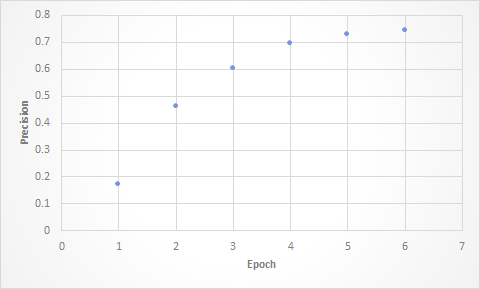

In [40]:
display(Image(filename='precision.png', width=500))

# Detect using our trained weights

We have a sample directory called `sample_test` that contains a few images taken from the test set of the CrowdHuman dataset stored locally. This is used for visualisation and detection purposes.

Here we use use the default IoU implementation.

In [ ]:
# IoU detection
%run detect.py --weights yolov5n_crowdhuman_img608_IoU.pt --source sample_test/

# Visualisation

In [5]:
from IPython.display import Image, display
import os

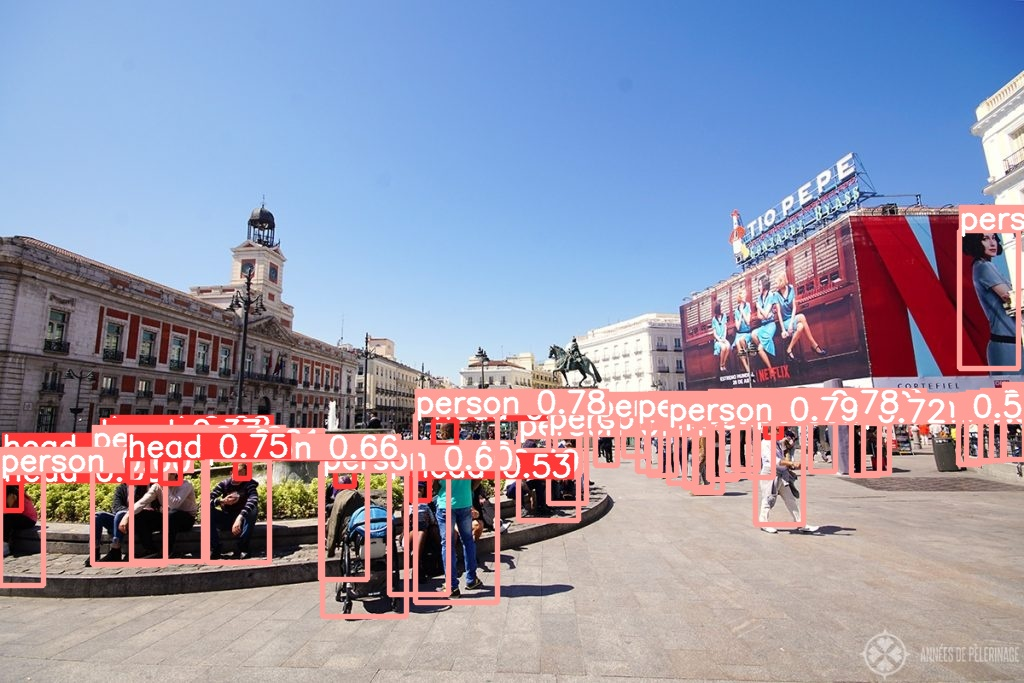

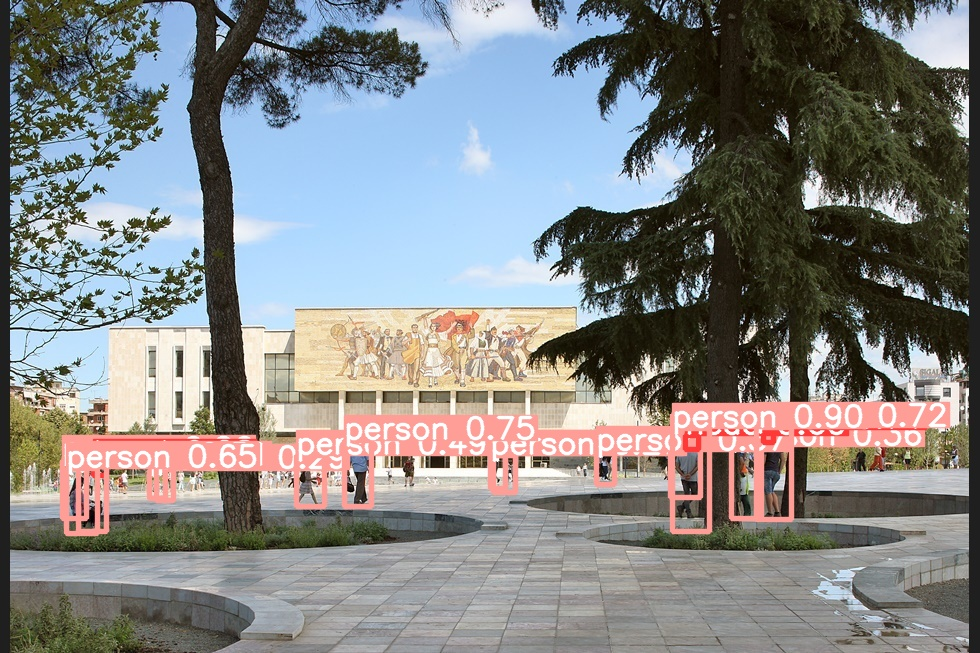

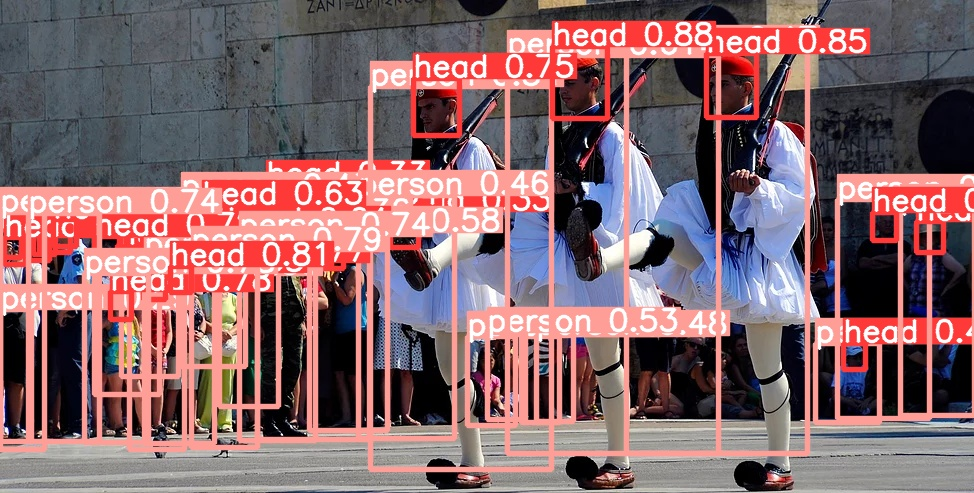

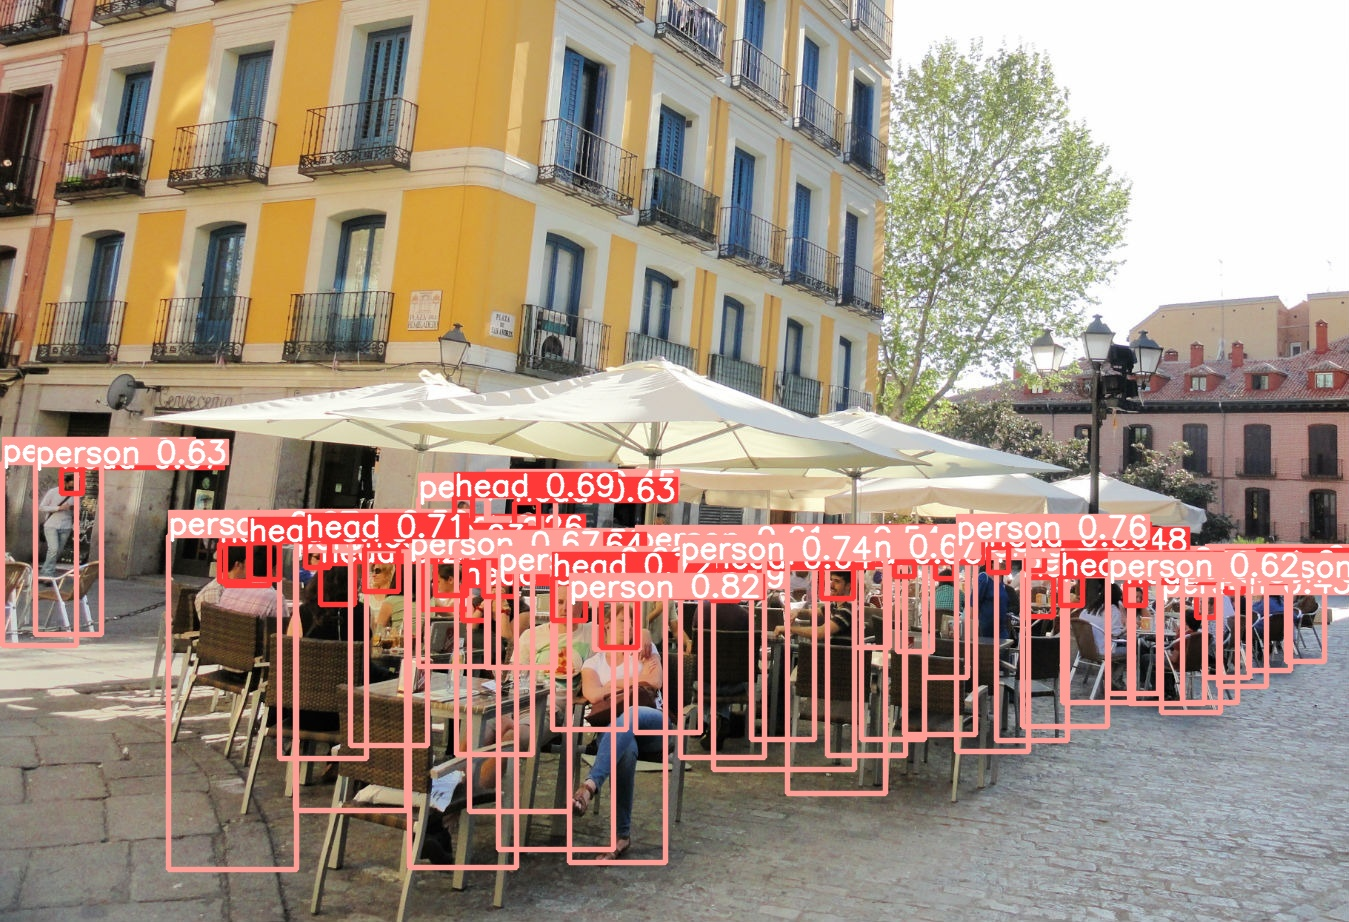

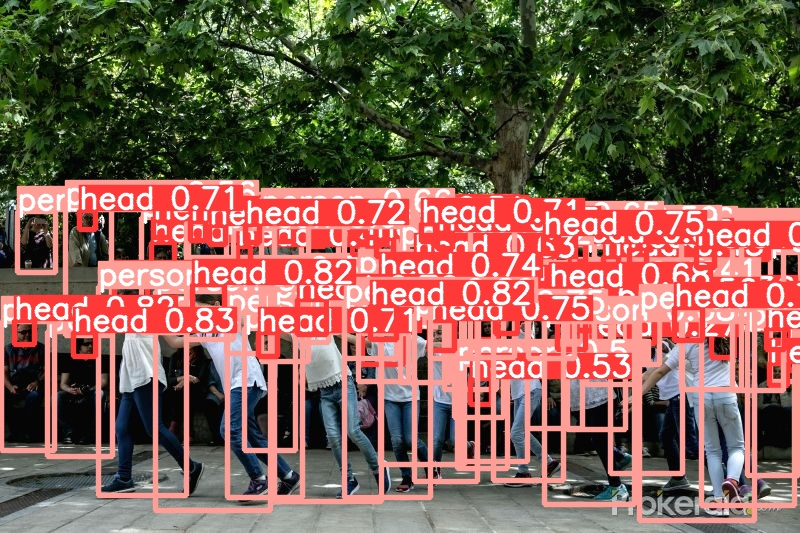

In [41]:
# EDIT THE PATHNAME FOR THE RUN YOU WANT SPECIFIED BY THE OUTPUT OF DETECT.PY
pathname = '/runs/detect/exp/'
for file in os.listdir(os.getcwd() + pathname)[:5]:
    filename = os.fsdecode(file)
    if filename.endswith(".jpg"):
        display(Image(filename='runs/detect/exp/' + filename, width=450))

Now we use the model trained with the DIoU implementation.

In the `utils/general.py`, we replaced the `torchvision.ops.nms` with our own `nms` function. Instead of calculating the IOU for the nms, we used the bbox_iou function to calculating the DIOU, which not only considers the overlapping area of two bonding boxes, but also takes into account their spatial distance.  In 'bbox_iou', after computing the standard IoU between a single bounding box (box1) and multiple bounding boxes (boxes) for variable 'inter', the diagonal squared distance between the bounding boxes' enclosing convex shapes is computed and used to adjust the IoU for variable 'rho_squared ', which penalizes boxes that are further apart from each other. 

In [ ]:
# DIoU detection
%run detect.py --weights yolov5n_crowdhuman_img608_DIoU.pt --source sample_test/

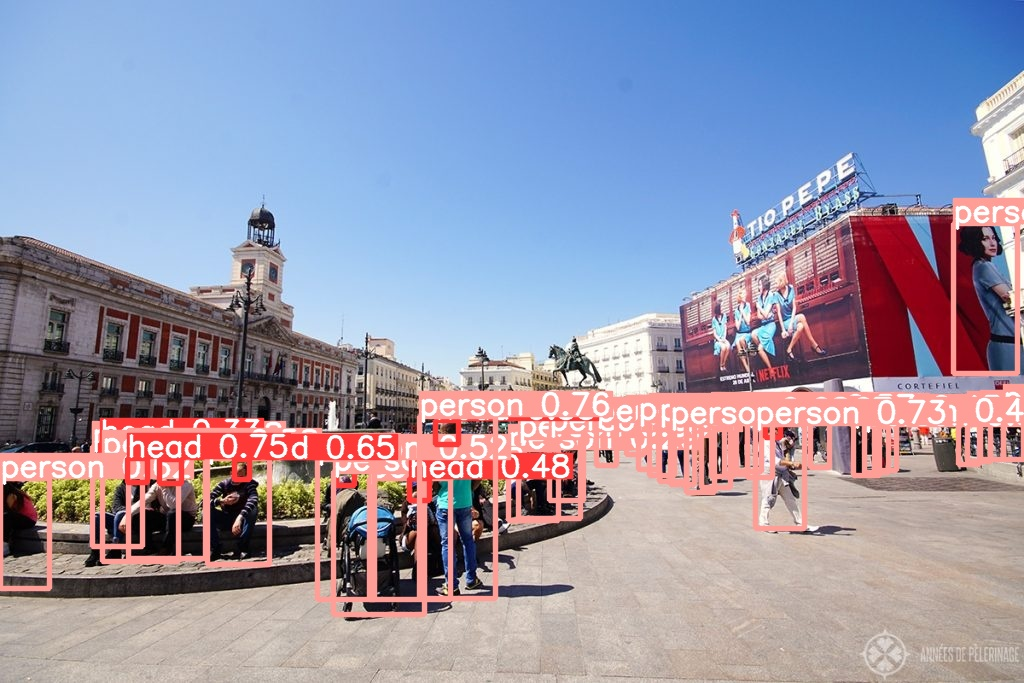

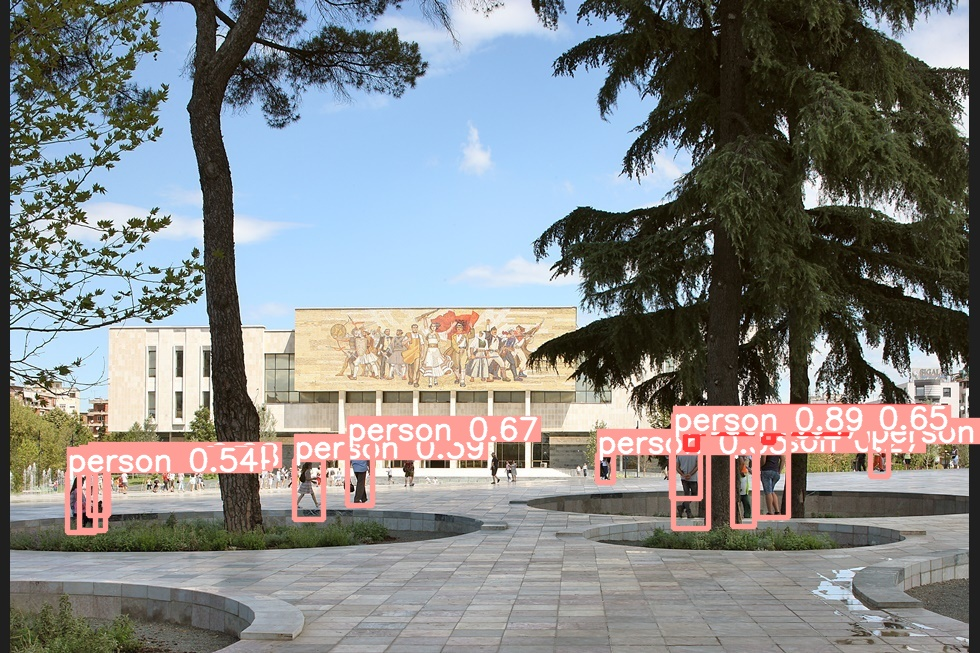

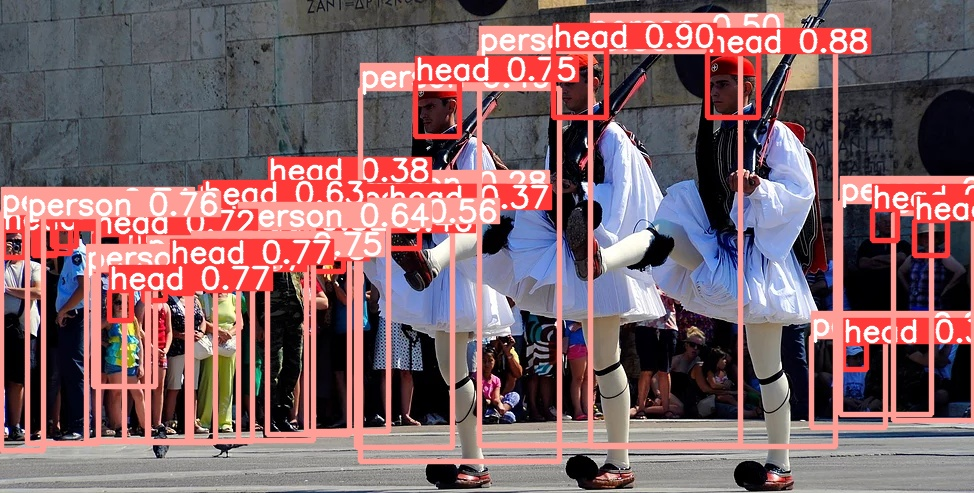

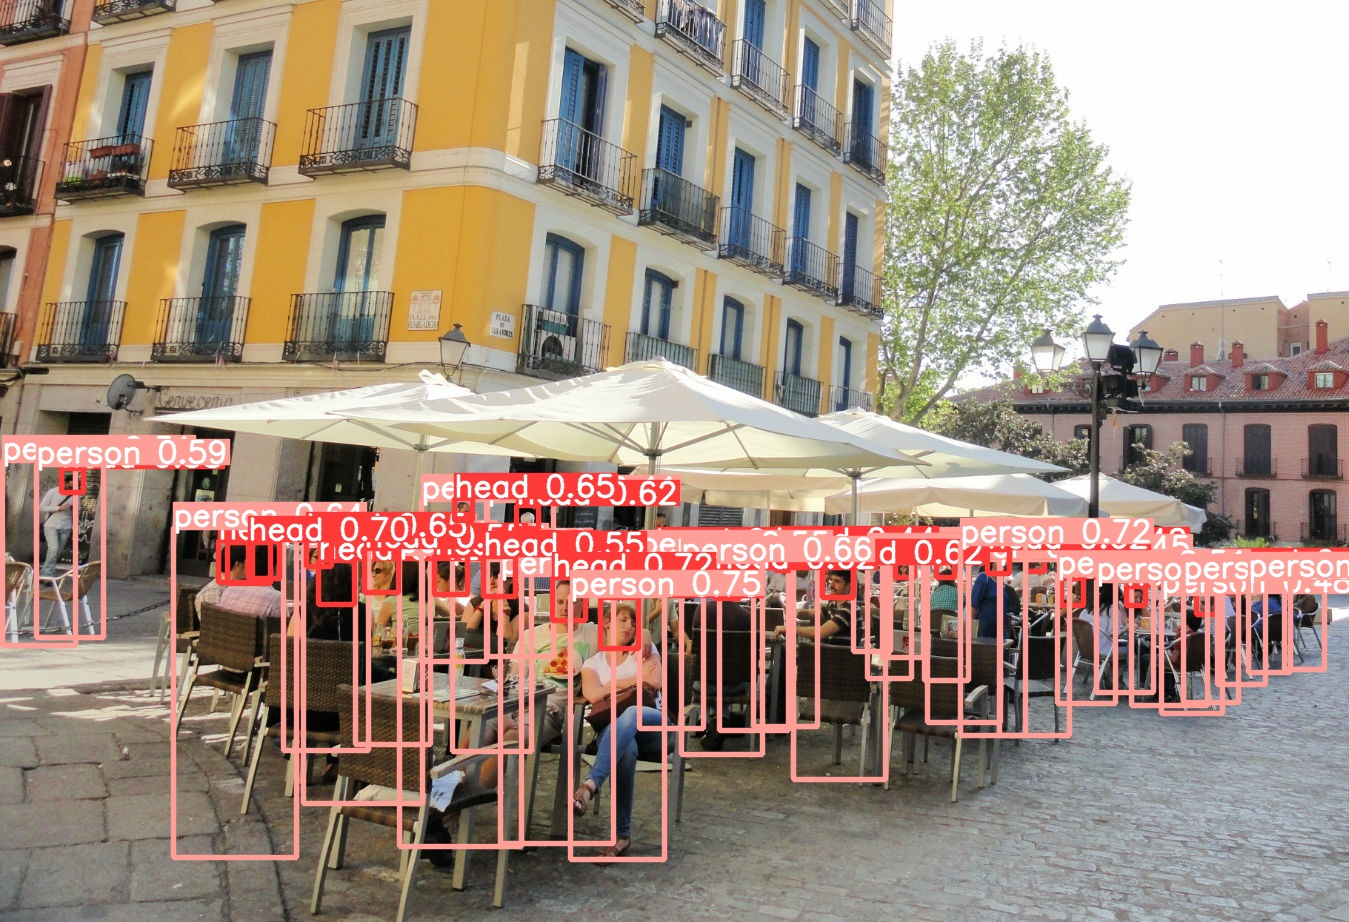

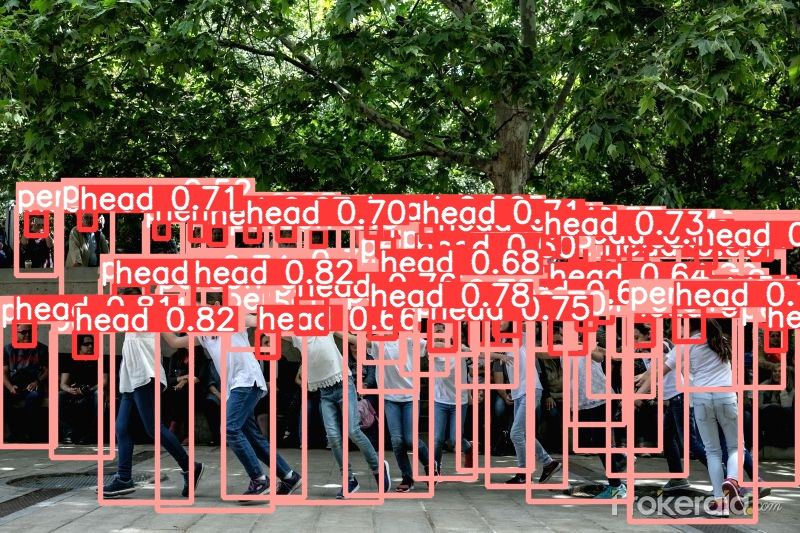

In [42]:
# EDIT THE PATHNAME FOR THE RUN YOU WANT SPECIFIED BY THE OUTPUT OF DETECT.PY
pathname = '/runs/detect/exp/'
for file in os.listdir(os.getcwd() + pathname)[:5]:
    filename = os.fsdecode(file)
    if filename.endswith(".jpg"):
        display(Image(filename='runs/detect/exp2/' + filename, width=450))

## Validation

The cell below demonstrates how to run validation for the trained models

In [ ]:
# uncomment below to run validation for IoU
#%run val.py --weights yolov5n_crowdhuman_img608_IoU.pt --data crowdhuman.yaml --img 608

# validation for DIoU
#%run val.py --weights yolov5n_crowdhuman_img608_DIoU.pt --data crowdhuman.yaml --img 608